# Healy chapter 4 figures (2022-09-02)

_by A. Maurits van der Veen_  

_Modification history:_  
_2022-08-23 - Initial version_  
_2022-09-02 - Clean-up_  

This notebook provides python code to parallel the R code in Healy's Data Visualization book. 

It uses the `plotnine` module in python, which replicates most of ggplot.


## 0. General preparation

The code relies on several python modules, which may need to be installed first. To do so, uncomment the next X code snippets.

- `plotnine` is the main module replicating ggplot
- `mizani` provides axis label formatting
- `pyreadr` reads R-format datasets


In [1]:
# !pip install plotnine


In [2]:
# !pip install mizani


In [3]:
# !pip install pyreadr


In [4]:
import math
import numpy as np

import pandas as pd
# import geopandas as gpd  # Not necessary until chapter 7

import matplotlib.pyplot as plt

from plotnine import *  # alternative: import plotnine as p9 and always use prefix
from mizani.formatters import currency_format

import pyreadr


## Chapter 4 - Show the right numbers

The headings below correspond to chapter sections in the book. If a heading number is skipped (as is the case for 4.1 here), that is because there are no figures in those sections.

In [5]:
localfolder = '/Users/yourname/Downloads/'  # Change to local path


In [6]:
# Retrieve & load gapminder data

remotefolder = 'https://github.com/jennybc/gapminder/blob/main/data/'

targetfile = 'gapminder.rdata'
pyreadr.download_file(remotefolder + targetfile + '?raw=true', 
                      localfolder + targetfile)
newdata = pyreadr.read_r(localfolder + targetfile)
gapminder = newdata['gapminder']


In [7]:
# Retrieve & load data from the website associated with Healy's book

remotefolder = 'https://github.com/kjhealy/socviz/blob/master/data/'

# The following is a bit repetitive, but necessary because python doesn't like passing by reference

datasetname = 'gss_sm'
targetfile = datasetname + '.rda'
pyreadr.download_file(remotefolder + targetfile + '?raw=true', localfolder + targetfile)
newdata = pyreadr.read_r(localfolder + targetfile)
gss_sm = newdata[datasetname]

datasetname = 'titanic'
targetfile = datasetname + '.rda'
pyreadr.download_file(remotefolder + targetfile + '?raw=true', localfolder + targetfile)
newdata = pyreadr.read_r(localfolder + targetfile)
titanic = newdata[datasetname]

datasetname = 'oecd_sum'
targetfile = datasetname + '.rda'
pyreadr.download_file(remotefolder + targetfile + '?raw=true', localfolder + targetfile)
newdata = pyreadr.read_r(localfolder + targetfile)
oecd_sum = newdata[datasetname]


In [8]:
# Retrieve & load data that comes with ggplot

remotefolder = 'https://github.com/tidyverse/ggplot2/blob/main/data/'

datasetname = 'midwest'
targetfile = datasetname + '.rda'
pyreadr.download_file(remotefolder + targetfile + '?raw=true', localfolder + targetfile)
newdata = pyreadr.read_r(localfolder + targetfile)
midwest = newdata[datasetname]


### 4.2 Grouped data and the 'group' aesthetic

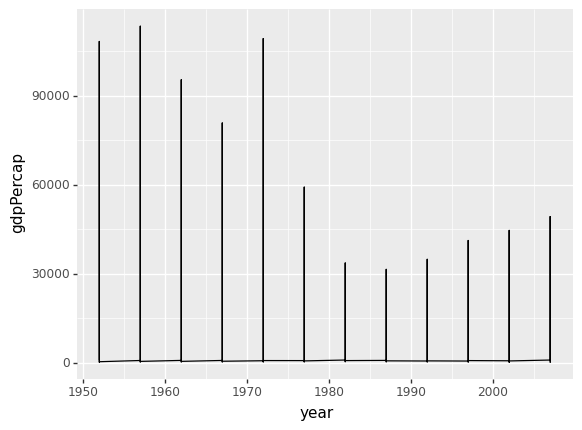

<ggplot: (318030153)>

In [9]:
# Figure 4.1

p = ggplot(data = gapminder,
           mapping = aes(x = 'year', y = 'gdpPercap'))
p + geom_line()

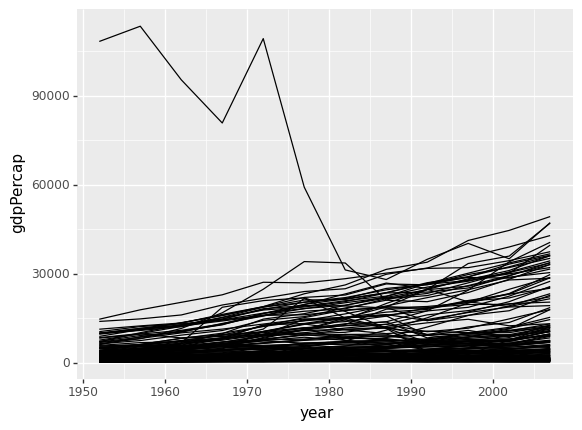

<ggplot: (318034044)>

In [10]:
# Figure 4.2

p = ggplot(data = gapminder,
           mapping = aes(x = 'year', y = 'gdpPercap'))
p + geom_line(aes(group = 'country'))

### 4.3 Facet to make small multiples

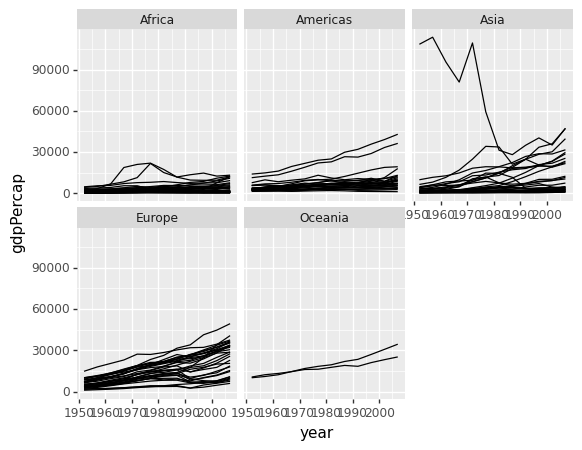

<ggplot: (318323197)>

In [11]:
# Figure 4.3
# Note that the default is not to display in a single column, as in Healy's book

p + geom_line(aes(group = 'country')) +\
    facet_wrap('continent')

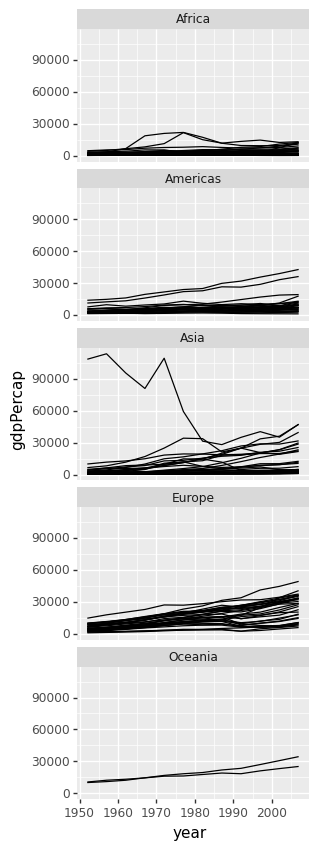

<ggplot: (318614007)>

In [12]:
# Figure 4.3, in a single column
# Here we use the ncol parameter to specify number of columns,
# and the figure_size theme parameter to adjust figure size

p + geom_line(aes(group = 'country')) +\
    facet_wrap('continent', ncol = 1) +\
    theme(figure_size = (3, 10))

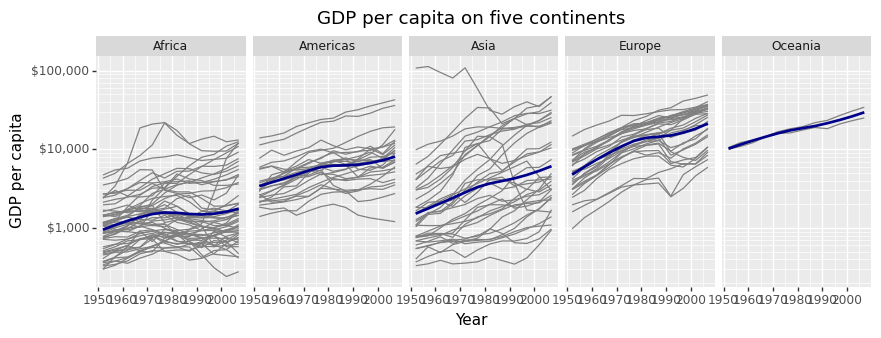

<ggplot: (318903543)>

In [13]:
# Figure 4.4
# In Healy's book, the smoothed line is bluish, but there is no code to specify that

p + geom_line(color='gray', mapping=aes(group = 'country')) + \
    geom_smooth(size=1.1, method='loess', se=False, color='darkblue') + \
    scale_y_log10(labels = currency_format(digits=0, big_mark=',')) + \
    facet_wrap('continent', ncol=5) + \
    labs(x = 'Year',
         y = 'GDP per capita',
         title = 'GDP per capita on five continents') + \
    theme(figure_size = (10, 3))

/opt/anaconda3/lib/python3.9/site-packages/plotnine/layer.py:412: PlotnineWarning: geom_point : Removed 18 rows containing missing values.


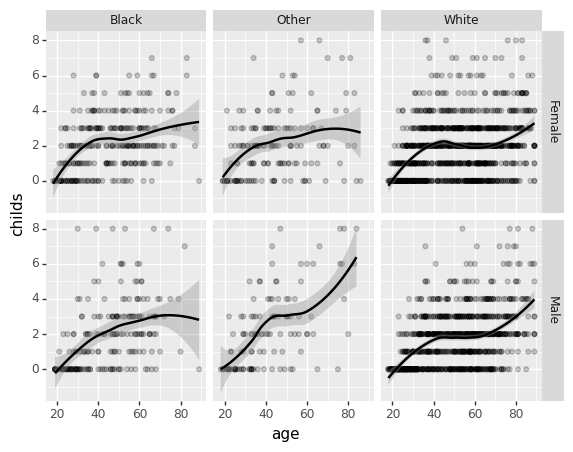

<ggplot: (329447412)>

In [14]:
# Figure 4.5 (note: new dataset)

p = ggplot(data = gss_sm, mapping = aes(x = 'age', y = 'childs'))
p + geom_point(alpha = 0.2) + \
    geom_smooth(method = 'loess') + \
    facet_grid(('sex', 'race'))

### 4.4 Geoms can transform data

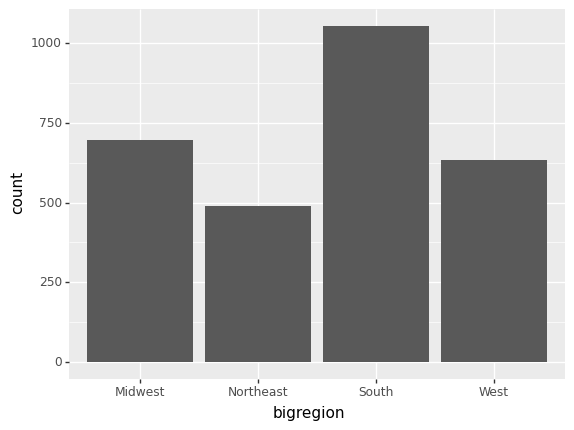

<ggplot: (329444940)>

In [15]:
# Figure 4.6
# Note that the default sorting here is alphabetic by region name
# For an example of forcing a different sort order, see:
# https://plotnine.readthedocs.io/en/stable/tutorials/miscellaneous-order-plot-series.html

p = ggplot(data = gss_sm, mapping = aes(x='bigregion'))
p + geom_bar()

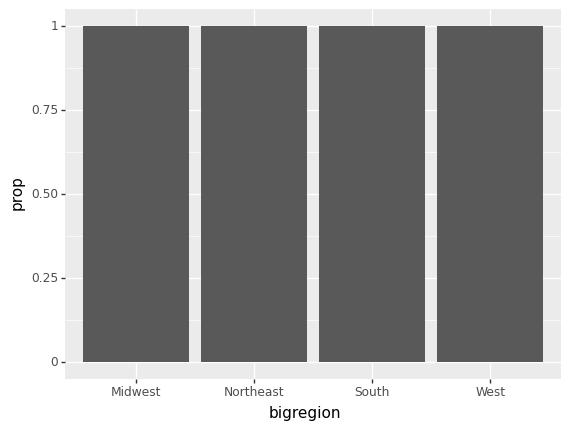

<ggplot: (329445651)>

In [16]:
# Figure 4.7

p = ggplot(data = gss_sm, mapping = aes(x='bigregion', y='..prop..'))
p + geom_bar()

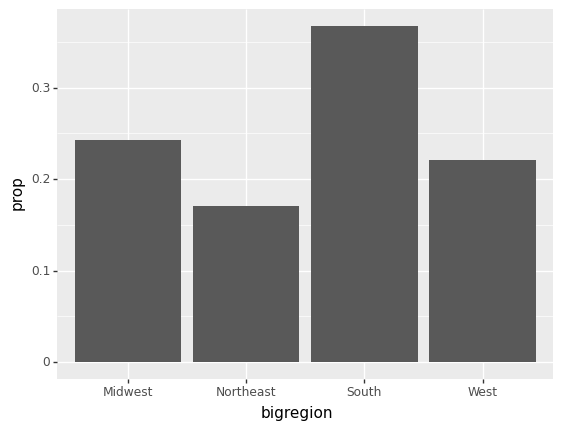

<ggplot: (329699660)>

In [17]:
# Figure 4.8

p = ggplot(data = gss_sm, mapping = aes(x='bigregion', y='..prop..', group = 1))
p + geom_bar()

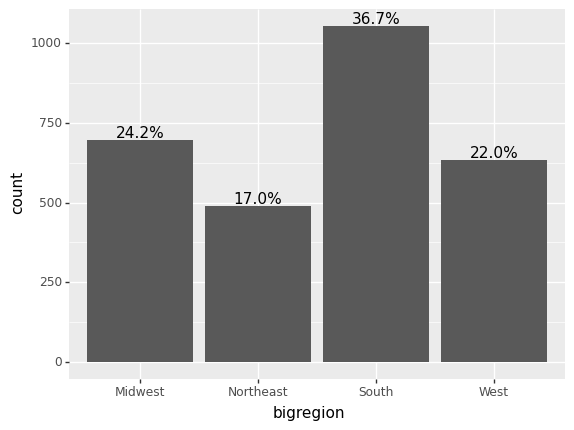

<ggplot: (329769108)>

In [18]:
# Figure 4.8 again, now showing both count and percentages
# This shows off the 'after_stat' option in plotnine

# Info on the use of geom_text:
# https://plotnine.readthedocs.io/en/stable/tutorials/miscellaneous-show-counts-and-percentages-for-bar-plots.html

p = ggplot(data = gss_sm, mapping = aes(x='bigregion'))
p + geom_bar() + \
    geom_text(
     aes(label=after_stat('prop*100'), group=1),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     format_string='{:.1f}%'
 )


In [19]:
# Figure 4.9a -- a first, failed, attempt
# Note that a missing/null value for religion is not handled well
# To fix: replace nulls by the string 'NA', or else simply eliminate them
# See the code snippets below

p = ggplot(data = gss_sm, mapping = aes(x = 'religion', color = 'religion'))

p + geom_bar()

TypeError: '<' not supported between instances of 'str' and 'float'

In [20]:
# Option 1 -- remove observations with a Null religion

religions = ['Protestant', 'Catholic', 'Jewish', 'None', 'Other']

gss_smX = gss_sm[gss_sm['religion'].isin(religions)]


In [21]:
len(gss_sm)

2867

In [22]:
len(gss_smX)  # 18 observations have been deleted

2849

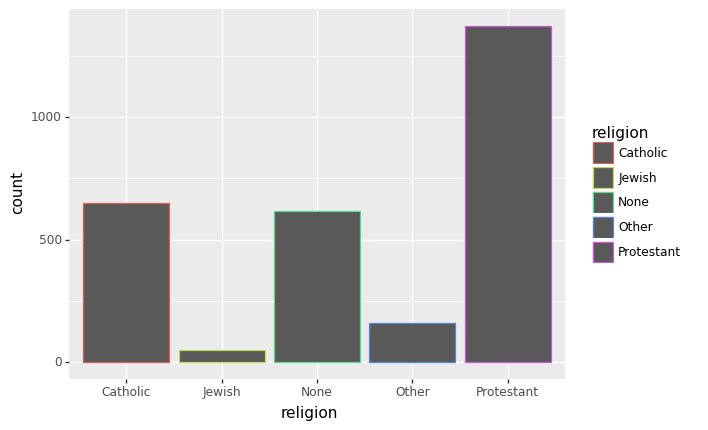

<ggplot: (329726952)>

In [23]:
# Figure 4.9a, excluding the missing values for religion
# Note again the alphabetic sorting of the bars, by religion name

p = ggplot(data = gss_smX, mapping = aes(x='religion', color='religion'))
p + geom_bar() + guides(fill=False) 

In [24]:
# Option 2 -- replace Null religion by 'NA': now NA will get plotted, as in the book

religions = ['Protestant', 'Catholic', 'Jewish', 'None', 'Other']

gss_smY = gss_sm.copy()
gss_smY['religion'] = gss_smY.apply(lambda row: 'NA' if row['religion'] not in religions else row['religion'], axis=1)

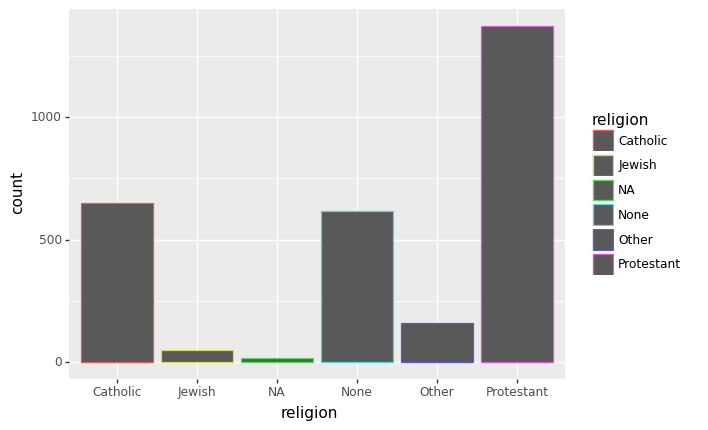

<ggplot: (329927906)>

In [25]:
# Figure 4.9a, now showing missing religion values as 'NA'

p = ggplot(data = gss_smY, mapping = aes(x='religion', color='religion'))

p + geom_bar()

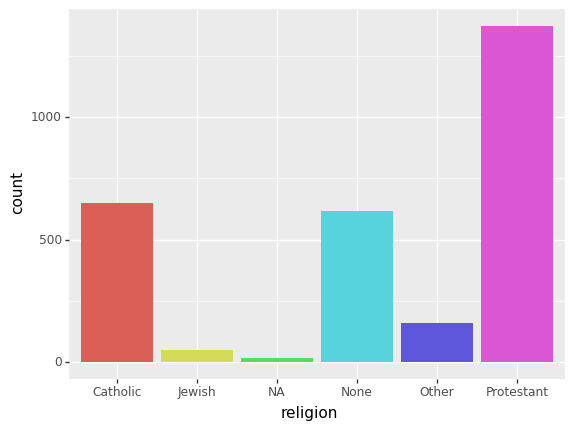

<ggplot: (329790790)>

In [26]:
# Figure 4.9b

p = ggplot(data = gss_smY, mapping = aes(x='religion', fill='religion'))

p + geom_bar() + guides(fill=False) 

### 4.5 Frequency plots the slightly awkward way

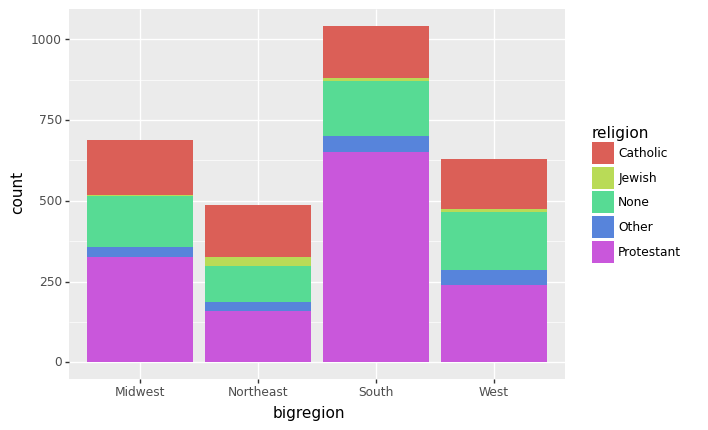

<ggplot: (330037923)>

In [27]:
# Figure 4.10

p = ggplot(data = gss_smX, mapping = aes(x='bigregion', fill='religion'))

p + geom_bar() 

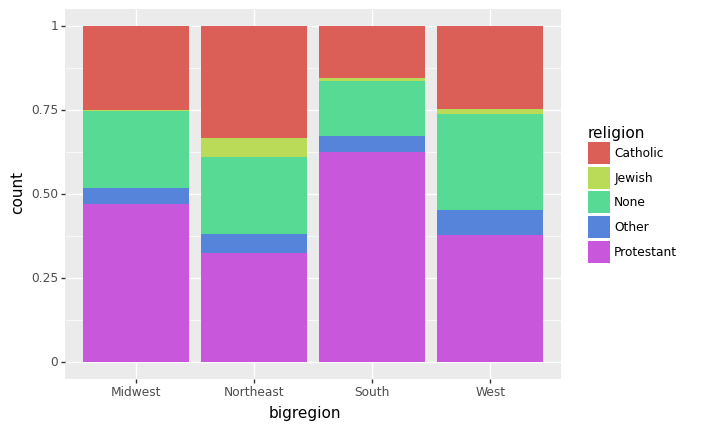

<ggplot: (329754116)>

In [28]:
# Figure 4.11

p = ggplot(data = gss_smX, mapping = aes(x='bigregion', fill='religion'))

p + geom_bar(position='fill') 

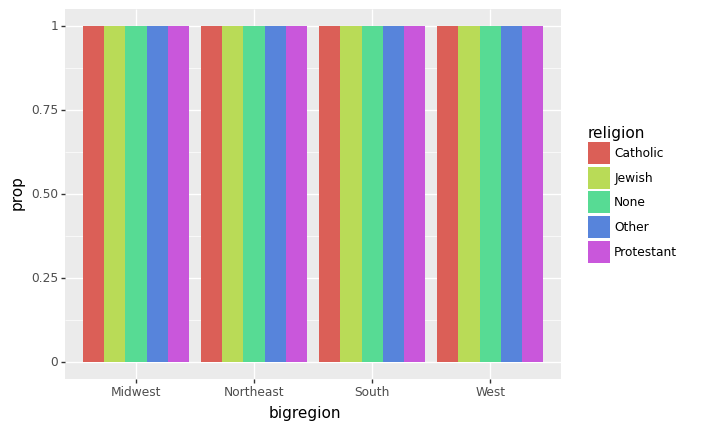

<ggplot: (318909618)>

In [29]:
# Figure 4.12, using the version of the dataset with NA

p = ggplot(data = gss_smX, 
           mapping = aes(x='bigregion', fill='religion'))

p + geom_bar(position='dodge', mapping=aes(y = '..prop..')) 

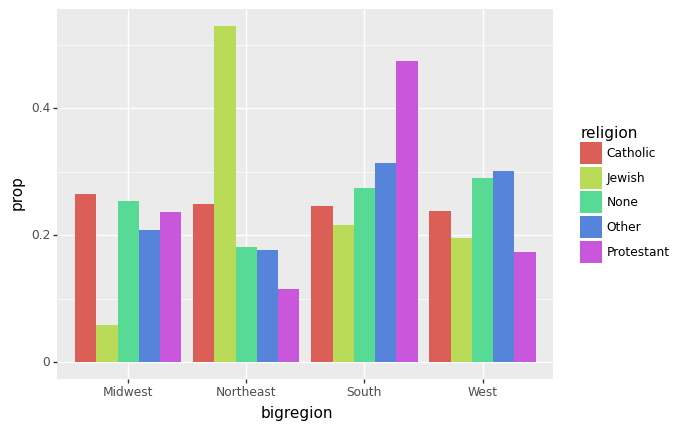

<ggplot: (329760708)>

In [30]:
# Figure 4.13

p + geom_bar(position='dodge', mapping=aes(y = '..prop..', group = 'religion')) 

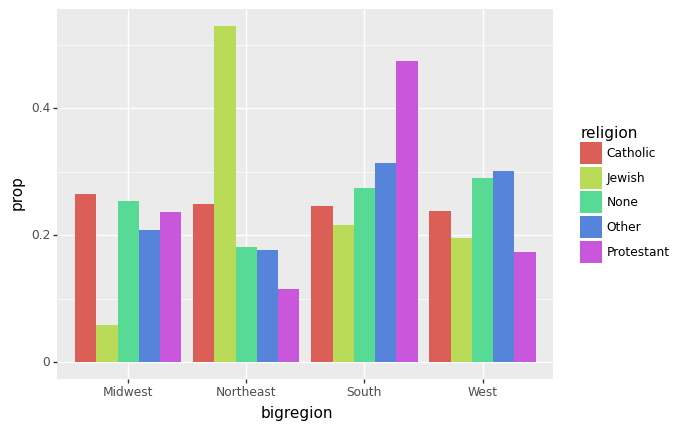

<ggplot: (318626247)>

In [31]:
# Figure 4.13 again, now using the after_stat option
# (more info: https://plotnine.readthedocs.io/en/latest/generated/plotnine.mapping.after_stat.html)
    
p + geom_bar(position='dodge', mapping=aes(y = after_stat('prop'), group = 'religion')) 

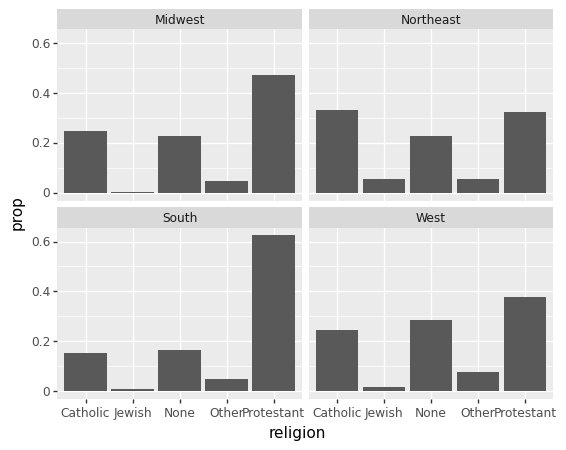

<ggplot: (318293161)>

In [32]:
# Figure 4.14

p = ggplot(data = gss_smX, mapping = aes(x='religion'))

p + geom_bar(position='dodge', 
             mapping = aes(y = after_stat('prop'), group = 'bigregion')) + \
    facet_wrap('bigregion', ncol=2)

### 4.6 Histograms and density plots

/opt/anaconda3/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 29'. Pick better value with 'binwidth'.


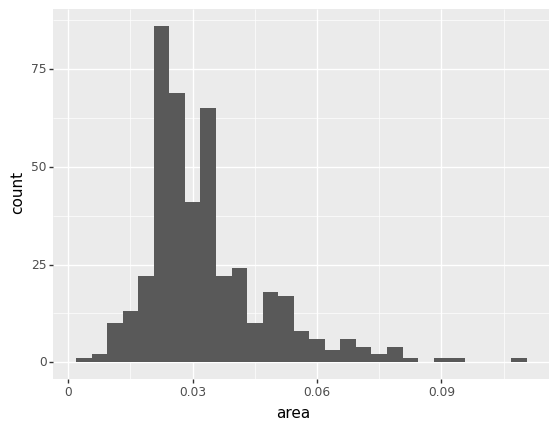

<ggplot: (318429371)>

In [33]:
# Figure 4.15a

p = ggplot(data = midwest, mapping = aes(x = 'area'))
p + geom_histogram()

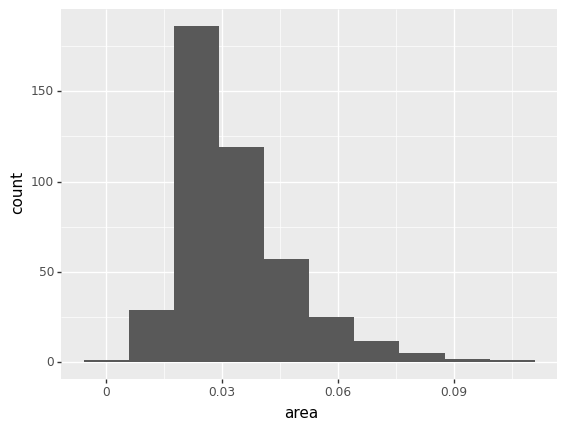

<ggplot: (318597916)>

In [34]:
# Figure 4.15b

p = ggplot(data = midwest, mapping = aes(x = 'area'))
p + geom_histogram(bins=10)

In [35]:
# Define a subset of the data 
# Note: could also do this on the fly, by simply copying the subset spec to 
# the "data =" statement in ggplot below

midwest_OH_WI = midwest[midwest['state'].isin(('OH', 'WI'))]

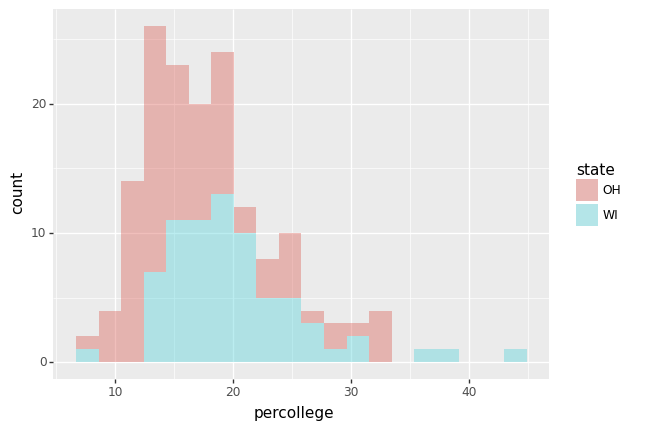

<ggplot: (318670948)>

In [36]:
# Figure 4.16

p = ggplot(data = midwest_OH_WI, mapping = aes(x = 'percollege', fill='state'))
p + geom_histogram(alpha = 0.4, bins = 20)

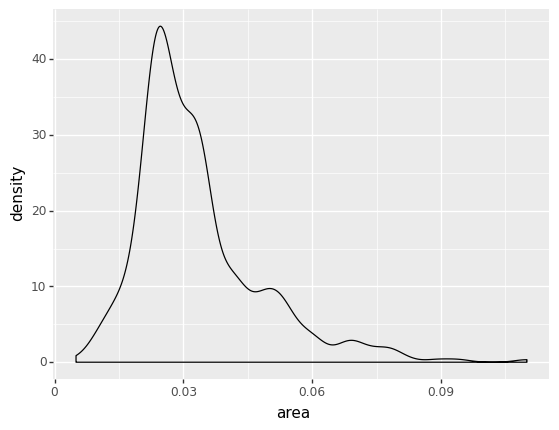

<ggplot: (318339253)>

In [37]:
# Figure 4.17

p = ggplot(data = midwest, mapping = aes(x = 'area'))
p + geom_density()

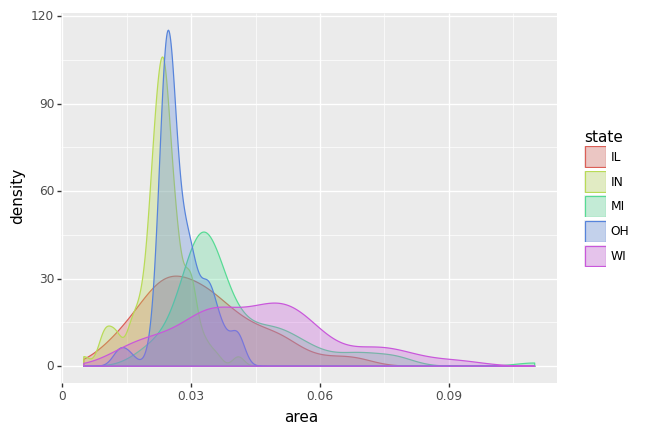

<ggplot: (318875826)>

In [38]:
# Figure 4.18

p = ggplot(data = midwest, mapping = aes(x = 'area', fill='state', color='state'))
p + geom_density(alpha = 0.3)

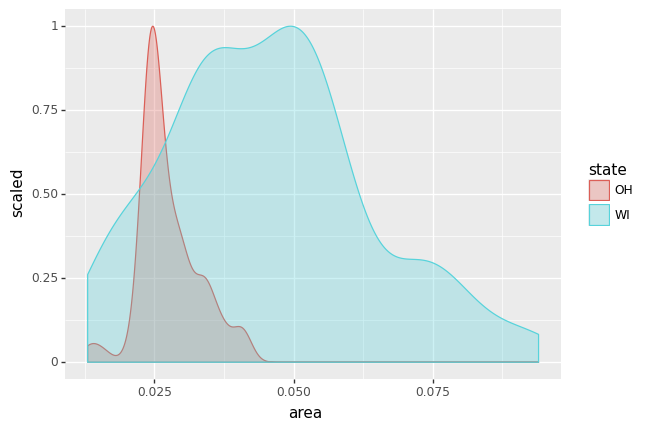

<ggplot: (318406672)>

In [39]:
# Figure 4.19

p = ggplot(data = midwest_OH_WI, mapping = aes(x = 'area', fill='state', color='state'))
p + geom_density(alpha = 0.3, mapping = aes(y = after_stat('scaled')))

### 4.7 Avoid transformations when necessary

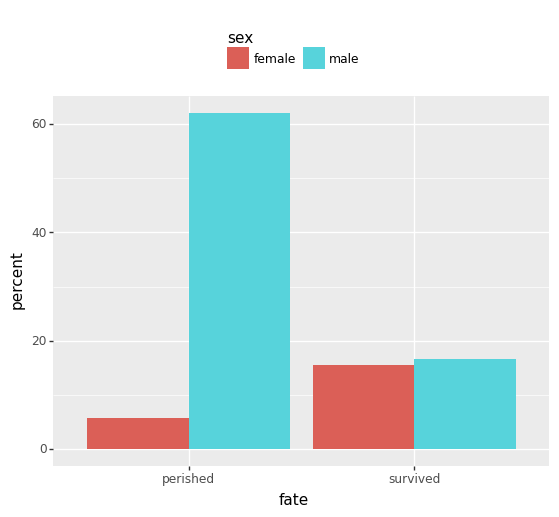

<ggplot: (318402344)>

In [40]:
# Figure 4.20

p = ggplot(data=titanic, 
           mapping = aes(x = 'fate', y = 'percent', fill='sex'))

p + geom_bar(position = 'dodge', stat = 'identity') + \
    theme(legend_position = 'top')

/opt/anaconda3/lib/python3.9/site-packages/plotnine/layer.py:392: PlotnineWarning: position_stack : Removed 1 rows containing missing values.


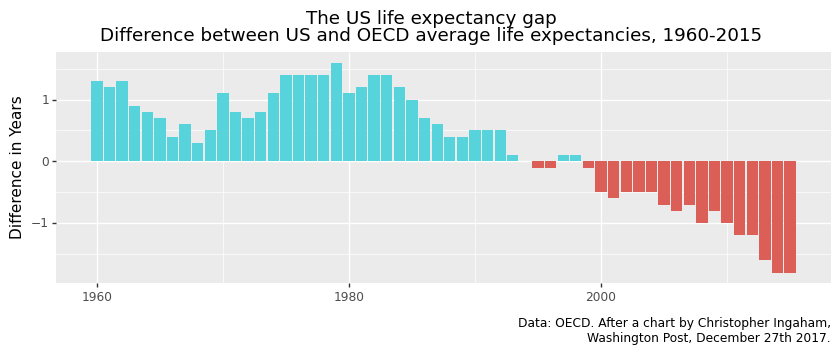

<ggplot: (318788063)>

In [41]:
# Figure 4.21
# Note: to create a true subtitle, export to matplotlib and add subtitle there
# (see example in chapter 3 notebook)

p = ggplot(data = oecd_sum, 
           mapping = aes(x = 'year', y = 'diff', fill = 'hi_lo'))

p + geom_col() + \
    guides(fill = False) + \
    labs(x = '',
         y = 'Difference in Years',
         title = 'The US life expectancy gap\nDifference between US and OECD average life expectancies, 1960-2015',
         caption = 'Data: OECD. After a chart by Christopher Ingaham,\nWashington Post, December 27th 2017.') + \
    theme(figure_size = (10, 3))


### This completes the figures for chapter 4